In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Data/healthcare-dataset-stroke-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.isna().sum().sort_values()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
bmi                  201
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [7]:
df.isna().sum().sort_values()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,Binarizer, OrdinalEncoder,LabelBinarizer


In [10]:
la= LabelEncoder()

In [11]:
df['gender']=la.fit_transform(df['gender'])

In [12]:
df['smoking_status']=la.fit_transform(df['smoking_status'])

In [13]:
df['ever_married']=la.fit_transform(df['ever_married'])

In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,2,1
2,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,3,1
3,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,2,1
4,56669,1,81.0,0,0,1,Private,Urban,186.21,29.0,1,1


In [15]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [16]:
ohe= OneHotEncoder(sparse_output=False)

In [17]:




temp=ohe.fit_transform(df[['work_type']])
temp=pd.DataFrame(temp,columns=['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'])

In [18]:
df= pd.concat([df,temp],axis=1)

In [19]:
df.drop('work_type',axis=1,inplace=True)

In [20]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,Govt_job,children,Never_worked
0,9046,1,67.0,0,1,1,Urban,228.69,36.6,1,1,0.0,0.0,1.0,0.0,0.0
1,31112,1,80.0,0,1,1,Rural,105.92,32.5,2,1,0.0,0.0,1.0,0.0,0.0
2,60182,0,49.0,0,0,1,Urban,171.23,34.4,3,1,0.0,0.0,1.0,0.0,0.0
3,1665,0,79.0,1,0,1,Rural,174.12,24.0,2,1,0.0,0.0,0.0,1.0,0.0
4,56669,1,81.0,0,0,1,Urban,186.21,29.0,1,1,0.0,0.0,1.0,0.0,0.0


In [21]:
df_copy=df

In [22]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,Govt_job,children,Never_worked,Residence_type_Urban
0,9046,1,67.0,0,1,1,228.69,36.6,1,1,0.0,0.0,1.0,0.0,0.0,True
1,31112,1,80.0,0,1,1,105.92,32.5,2,1,0.0,0.0,1.0,0.0,0.0,False
2,60182,0,49.0,0,0,1,171.23,34.4,3,1,0.0,0.0,1.0,0.0,0.0,True
3,1665,0,79.0,1,0,1,174.12,24.0,2,1,0.0,0.0,0.0,1.0,0.0,False
4,56669,1,81.0,0,0,1,186.21,29.0,1,1,0.0,0.0,1.0,0.0,0.0,True


In [23]:
df.drop('id',inplace=True,axis=1)

In [24]:
df.head()


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,Govt_job,children,Never_worked,Residence_type_Urban
0,1,67.0,0,1,1,228.69,36.6,1,1,0.0,0.0,1.0,0.0,0.0,True
1,1,80.0,0,1,1,105.92,32.5,2,1,0.0,0.0,1.0,0.0,0.0,False
2,0,49.0,0,0,1,171.23,34.4,3,1,0.0,0.0,1.0,0.0,0.0,True
3,0,79.0,1,0,1,174.12,24.0,2,1,0.0,0.0,0.0,1.0,0.0,False
4,1,81.0,0,0,1,186.21,29.0,1,1,0.0,0.0,1.0,0.0,0.0,True


In [25]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,Govt_job,children,Never_worked
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,105.305150,28.893237,1.375433,0.042575,0.128336,0.004482,0.572622,0.157873,0.136688
std,0.492309,22.555115,0.288875,0.216934,0.476167,44.424341,7.854067,1.067322,0.201917,0.334497,0.066801,0.494748,0.364659,0.343552
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,77.070000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,91.680000,28.100000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,113.570000,33.100000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


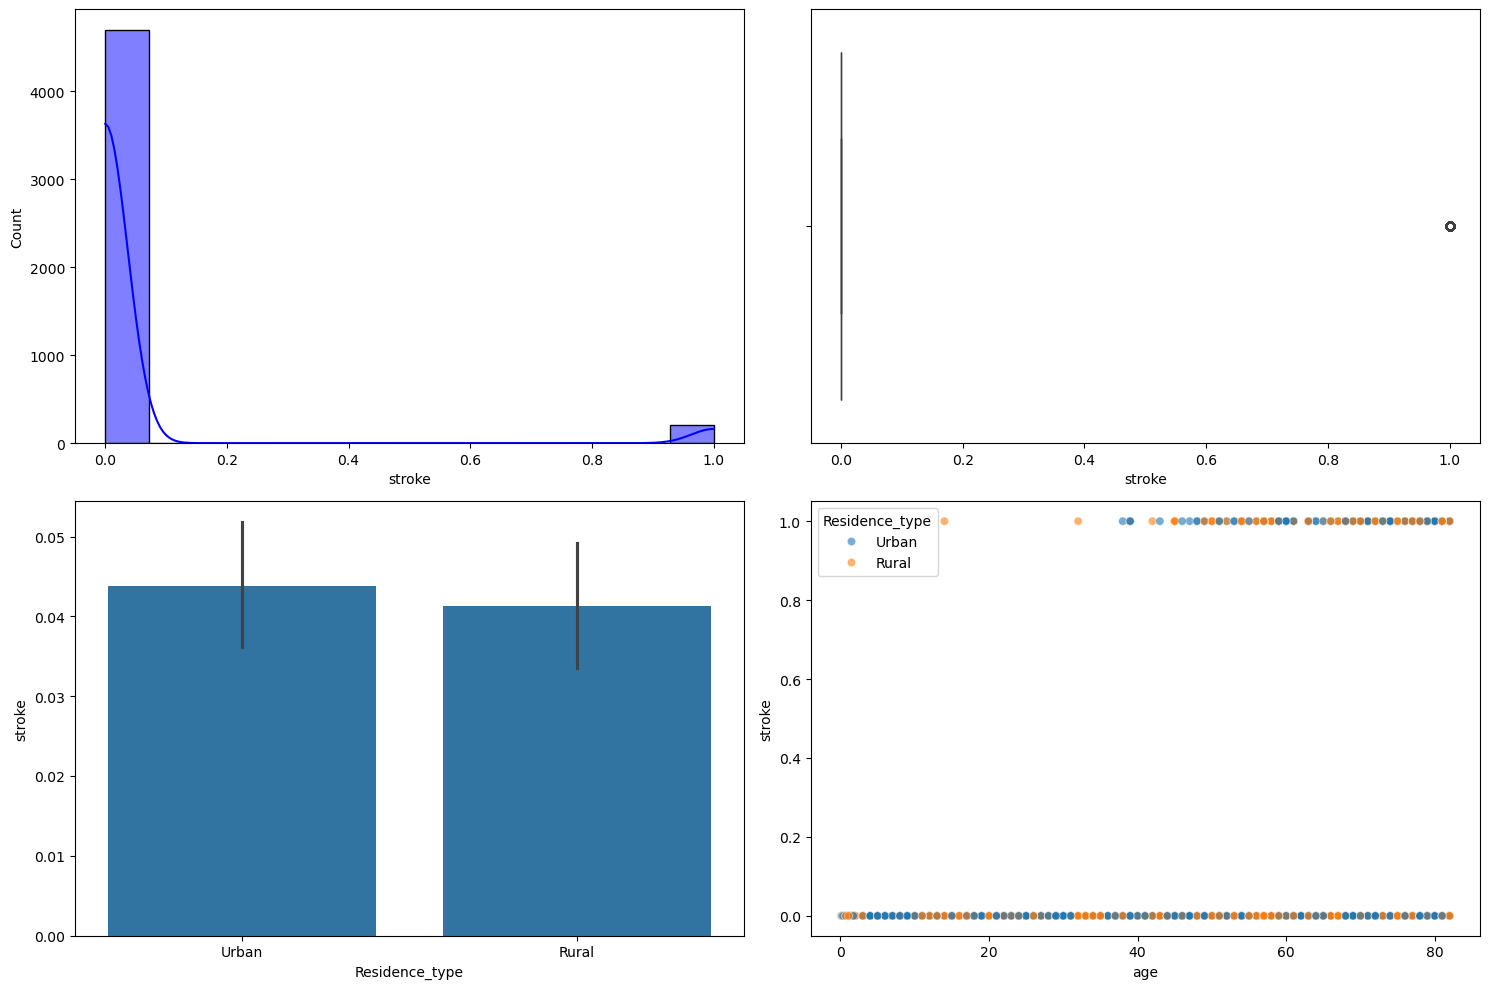

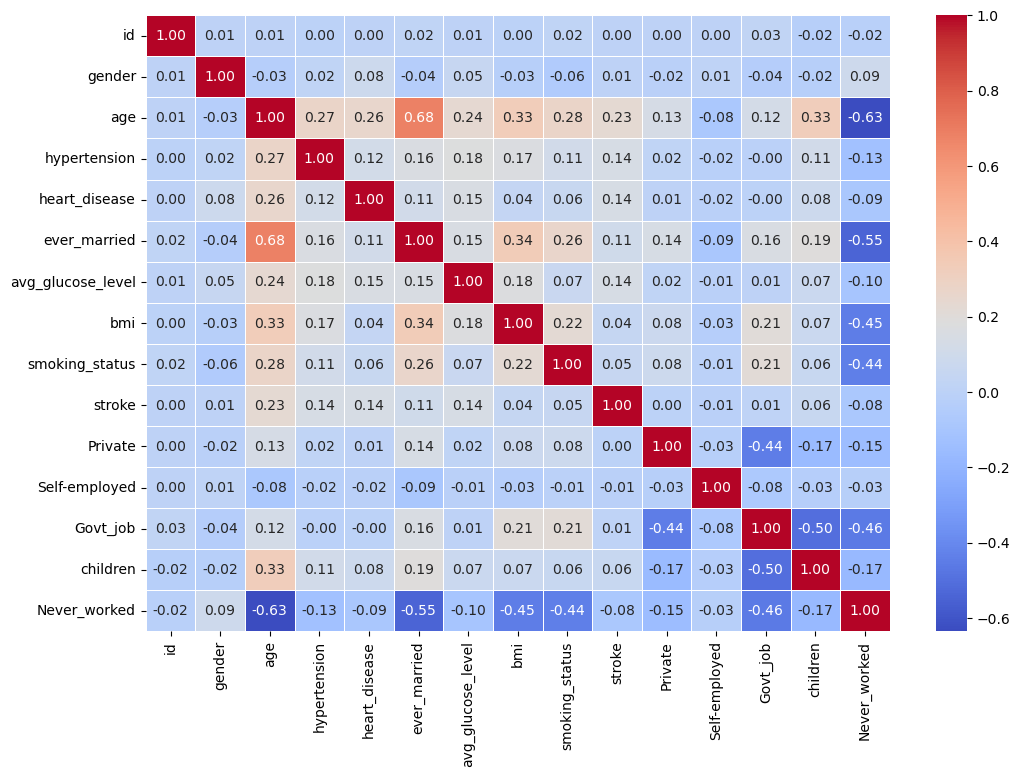

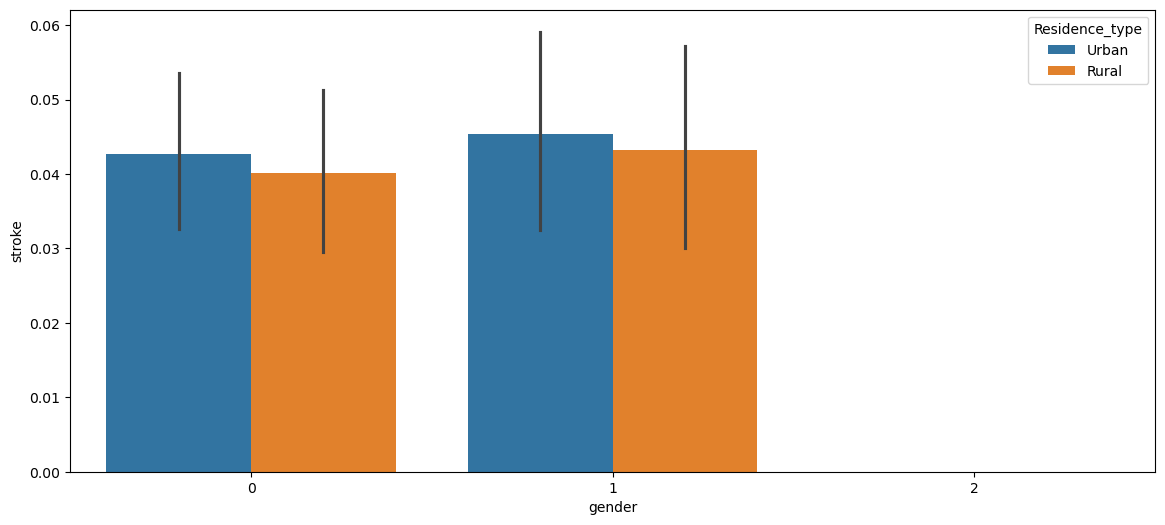

In [26]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_copy['stroke'], kde=True, color='blue')


plt.subplot(2, 2, 2)
sns.boxplot(x='stroke', data=df_copy)


plt.subplot(2, 2, 3)
sns.barplot(x='Residence_type', y='stroke', data=df_copy)


plt.subplot(2, 2, 4)
sns.scatterplot(x='age', y='stroke', data=df_copy, hue='Residence_type', alpha=0.6)


plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
corr = df_copy.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='gender', y='stroke', hue='Residence_type', data=df_copy)

plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler,RobustScaler
st=StandardScaler()

In [28]:
df[['age',]]=st.fit_transform(df[['age']])

In [29]:
rob=RobustScaler()

In [30]:
df[['avg_glucose_level','bmi']]=rob.fit_transform(df[['avg_glucose_level','bmi']])

In [31]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,Govt_job,children,Never_worked
count,4909.000000,4.909000e+03,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,1.679017e-16,0.091872,0.049501,0.652679,0.373292,0.082629,1.375433,0.042575,0.128336,0.004482,0.572622,0.157873,0.136688
std,0.492309,1.000102e+00,0.288875,0.216934,0.476167,1.217105,0.818132,1.067322,0.201917,0.334497,0.066801,0.494748,0.364659,0.343552
min,0.000000,-1.897119e+00,0.000000,0.000000,0.000000,-1.001644,-1.854167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.921571e-01,0.000000,0.000000,0.000000,-0.400274,-0.479167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.030973e-02,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,7.597555e-01,0.000000,0.000000,1.000000,0.599726,0.520833,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,1.735243e+00,1.000000,1.000000,1.000000,4.933151,7.239583,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [33]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=None,shuffle=True)

In [35]:
log=LogisticRegression(class_weight='balanced',penalty='l2',max_iter=200)

In [36]:
log.fit(X_train,y_train)

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [37]:
y_pred=log.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,roc_curve,roc_auc_score,

SyntaxError: trailing comma not allowed without surrounding parentheses (1898847593.py, line 1)

report               precision    recall  f1-score   support

           0       0.99      0.74      0.85       929
           1       0.16      0.85      0.27        53

    accuracy                           0.75       982
   macro avg       0.57      0.79      0.56       982
weighted avg       0.94      0.75      0.82       982

f1_score macro  0.5561279782164738
f1_score weighted 0.8153965497401144
precision 0.15734265734265734
recall 0.8490566037735849
roc (array([0.        , 0.25941873, 1.        ]), array([0.       , 0.8490566, 1.       ]), array([inf,  1.,  0.]))
roc auc 0.7948189369782886
confusion_matrix [[688 241]
 [  8  45]]
accuracy score 0.7464358452138493


<Axes: >

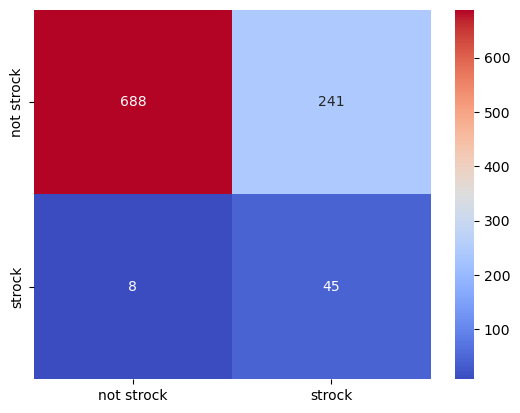

In [ ]:
clas = classification_report(y_test,y_pred)
f1_sc_macro=f1_score(y_test,y_pred,average='macro')
f1_sc_we=f1_score(y_test,y_pred,average='weighted')
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
roc = roc_curve(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
con=confusion_matrix(y_test,y_pred)
accuracy =accuracy_score(y_test,y_pred)


print(f'report {clas}')
print(f'f1_score macro  {f1_sc_macro}')
print(f'f1_score weighted {f1_sc_we}')
print(f'precision {prec}')
print(f'recall {recall}')
print(f'roc {roc}')
print(f'roc auc {roc_auc}')
print(f'confusion_matrix {con}')
print(f'accuracy score {accuracy}')
sns.heatmap(con,annot=True,fmt='d',xticklabels=['not strock','strock'],yticklabels=['not strock','strock'],cmap='coolwarm')



In [ ]:
y_pred_pro=log.predict_proba(X_test)[:,1]

In [ ]:
y_pred_pro

array([0.86632894, 0.2102391 , 0.76061949, 0.09709932, 0.26875575,
       0.64964884, 0.02180699, 0.44862208, 0.32683217, 0.18467543,
       0.6495276 , 0.53191404, 0.15425638, 0.03307485, 0.57779942,
       0.72191708, 0.03249336, 0.25618487, 0.41622224, 0.24764926,
       0.2159559 , 0.14066311, 0.83212653, 0.27922757, 0.1335381 ,
       0.55742318, 0.35262912, 0.02729546, 0.09175917, 0.33742368,
       0.50800929, 0.03184794, 0.22477005, 0.14699901, 0.23873984,
       0.45334239, 0.47741884, 0.05019204, 0.04947453, 0.83247929,
       0.44106997, 0.06113026, 0.02112031, 0.54732449, 0.02700213,
       0.37676946, 0.26702642, 0.10827635, 0.34945782, 0.4802922 ,
       0.04224522, 0.46893037, 0.02728116, 0.12866831, 0.03863949,
       0.01627688, 0.7991999 , 0.03534228, 0.03590471, 0.03811562,
       0.07945204, 0.01958154, 0.91043349, 0.77938992, 0.02132877,
       0.02955411, 0.04283151, 0.0581269 , 0.13821107, 0.03626454,
       0.25630428, 0.03885802, 0.02899846, 0.7474842 , 0.14914

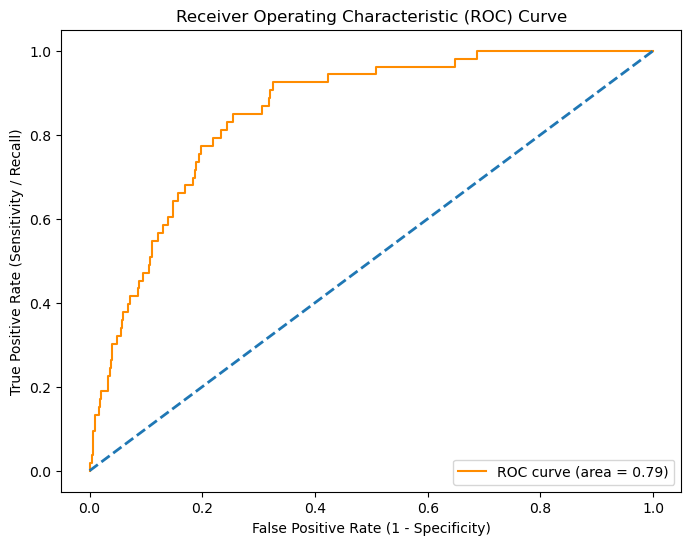

In [ ]:
fpr,tpr,thres = roc_curve(y_test,y_pred_pro)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))


plt.plot(fpr, tpr, color='darkorange' ,label=f'ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1] ,lw=2, linestyle='--')


plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right")

plt.show()

In [ ]:
models = {"LogisticRegression":LogisticRegression(
    class_weight='balanced',
    penalty='l2',
    max_iter=200
    )}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

models["RandomForest"] = RandomForestClassifier(class_weight='balanced', n_estimators=100)

In [ ]:
accuracy=[]
for model_name , model in models.items():
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)

    accu_train=accuracy_score(y_train,y_pred_train)
    accu_test=accuracy_score(y_test,y_pred_test)

    recall_train=recall_score(y_train,y_pred_train)
    recall_test=recall_score(y_test,y_pred_test)
    
    precision_train=precision_score(y_train,y_pred_train)
    precision_test=precision_score(y_test,y_pred_test)

    f1_train=f1_score(y_train,y_pred_train)
    f1_test=accuracy_score(y_test,y_pred_test)

    report_train=classification_report(y_train,y_pred_train)
    report_test=classification_report(y_test,y_pred_test)

    accuracy.append([accu_train,
            accu_test,
            recall_train,
            recall_test,
            precision_train,
            precision_test,
            f1_train,
            f1_test]
            )

    




/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

In [ ]:
accuracy=pd.DataFrame(accuracy,index=models,columns=['accu_train',
            'accu_test',
            'recall_train',
            'recall_test',
            'precision_train',
            'precision_test',
            'f1_train',
            'f1_test'])

In [ ]:
accuracy

,accu_train,accu_test,recall_train,recall_test,precision_train,precision_test,f1_train,f1_test
LogisticRegression,0.737204,0.746436,0.794872,0.849057,0.11032,0.157343,0.19375,0.746436
RandomForest,1.000000,0.946029,1.000000,0.000000,1.00000,0.000000,1.00000,0.946029


In [ ]:
print(f"report training {report_train}\n report testing {report_test}")

report training               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00       156

    accuracy                           1.00      3927
   macro avg       1.00      1.00      1.00      3927
weighted avg       1.00      1.00      1.00      3927

 report testing               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



In [ ]:


kf=KFold(n_splits=6,shuffle=True,random_state=42)
result=cross_val_score(log,X,y,cv=kf)

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be remov

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [ ]:
result.mean()

np.float64(0.7412910371345579)

In [ ]:
result.std()

np.float64(0.007638432014075717)

In [ ]:
print(np.quantile(result,[.25,.975]))

[0.74113692 0.75080324]


In [ ]:
from models import run_classification_models,classifications_models

In [ ]:
selected_keys = ["GaussianNB","BernoulliNB"]
selected_models = {}

for key in selected_keys:
    selected_models[key] = classifications_models[key]

result = run_classification_models(selected_models, X_train, X_test, y_train, y_test)


In [ ]:
result

,model,train_acc,test_acc,train_f1,test_f1
1,BernoulliNB,0.946269,0.937882,0.937135,0.920441
0,GaussianNB,0.373822,0.380855,0.500353,0.494499


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(random_state=42)

In [ ]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [ ]:
X_train_smote.shape

(7542, 14)

In [ ]:
y_train_smote.shape

(7542,)

In [ ]:
selected_keys = ["GaussianNB","BernoulliNB"]
selected_models = {}

for key in selected_keys:
    selected_models[key] = classifications_models[key]

result = run_classification_models(selected_models, X_train_smote, X_test, y_train_smote, y_test)

In [ ]:
result

,model,train_acc,test_acc,train_f1,test_f1
1,BernoulliNB,0.726995,0.541752,0.717296,0.655036
0,GaussianNB,0.645054,0.330957,0.595191,0.436007


In [ ]:
result=run_classification_models(classifications_models, X_train_smote, X_test, y_train_smote, y_test)